In [1]:
# loading data
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
num_epochs = 80
num_batch = 16

In [3]:
# standardization for input_data
x_train = train_data - train_data.mean(axis = 0)
x_train = x_train / x_train.std(axis = 0)

x_test = test_data - test_data.mean(axis = 0)
x_test = x_test / x_test.std(axis = 0)

# change name of test_target
y_train = train_target
y_test = test_target

In [4]:
# building network
from keras.models import *
from keras.layers import *
def build_model(input_data_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape = (input_data_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1)) # no activation method = linear
    model.compile(
        loss = 'mse',
        optimizer='rmsprop',
        metrics=['mae']
    )
    return model

In [5]:
# k-fold cross-validation
import numpy as np
def run_k_fold_validation(k, data, target, epochs_count, batch_count):
    val_samples = len(data) // k
    
    all_mae_histories = []
    for i in range(k):
        print("Processing fold number : ", i)
        val_start = i * val_samples
        val_end = (i + 1) * val_samples
        
        # validation samples
        val_data = data[val_start: val_end]
        val_target = target[val_start: val_end]
        
        # train samples
        train_data = np.concatenate([data[:val_start], data[val_end:]], axis = 0)
        train_target = np.concatenate([target[:val_start], target[val_end:]], axis = 0)
        
        # train
        network = build_model(data.shape[1])
        history = network.fit(
            train_data, train_target,
            validation_data = (val_data, val_target),
            epochs = epochs_count,
            batch_size = batch_count,
            verbose = 0
        )
        
        # add history
        all_mae_histories.append(history.history['val_mean_absolute_error'])
        print("End of process number : ", i)
        
    return all_mae_histories

In [6]:
# mean history
histories = run_k_fold_validation(4, x_train, y_train, num_epochs, num_batch)
avg_mae = [np.mean([histroy[i] for histroy in histories]) for i in range(num_epochs)]

Processing fold number :  0
End of process number :  0
Processing fold number :  1
End of process number :  1
Processing fold number :  2
End of process number :  2
Processing fold number :  3
End of process number :  3


In [7]:
# exponential moving average
def smooth_curve(points, factor = 0.9):
    smooth = []
    for point in points:
        if (smooth):
            smooth.append(smooth[-1] * factor + point * (1 - factor))
        else:
            smooth.append(point)
    return smooth
        

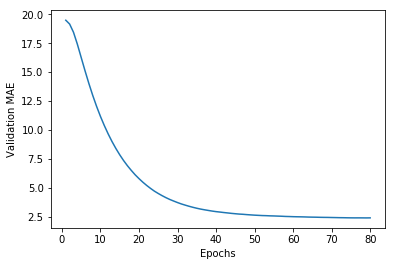

In [23]:
# plot
import matplotlib.pyplot as plt
smoothed = smooth_curve(avg_mae[:])
plt.clf()
plt.plot(range(1, len(smoothed) + 1), smoothed)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [19]:
network = build_model(x_train.shape[1])
network.fit(x_train, y_train, epochs=80, batch_size=16, verbose = 0)
network.evaluate(x_test, y_test)

102/102 [==============================] - 0s 1ms/step


[16.465447070551853, 2.5234423525193157]